In [1]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import re
import random
import seaborn as sns
import scipy

In [2]:
gc_dict = {}
for gcfile in glob.glob("counts/*tsv"):
    aligner = gcfile.split('_')[2]
    name = gcfile.split('_')[3]
    df = pd.read_csv(gcfile, sep='\t', index_col=0)
    cols = df.columns
    newcol = []
    for c in cols:
        nc = re.findall('SRR[0-9]{7}', c)[0]
        newcol.append(nc)
    df.columns=newcol  
    
    print(aligner, len(df))
    if aligner in gc_dict.keys():
        gc_dict[aligner].append(df)
    else:
        gc_dict[aligner]=[df]

bowtie2 59308
bowtie2 59304
bowtie2 59306
bwa 59303
bwa 59309
bwa 59305
kallisto 59353
kallisto 59353
salmon 59353
salmon 59353
salmon 59353


In [3]:
n=1000
rands = random.sample(range(59000), n)
rand_index = gc_dict['salmon'][0].index[rands]
SRRs = ['SRR5004097',  'SRR5004082',  'SRR5004085',  'SRR5004083']


# Counts within the same tool (different users)

Text(0.5, 0.98, 'salmon')

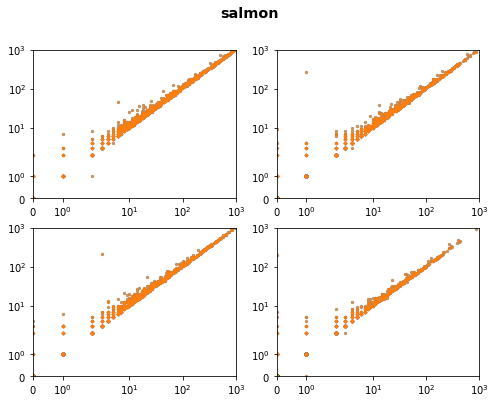

In [4]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'salmon'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)
    
fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


/Users/halexand/anaconda3/envs/python_lab/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


Text(0.5, 0.98, 'bwa')

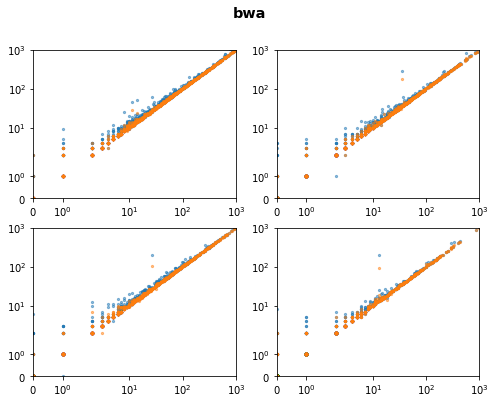

In [5]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'bwa'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)

fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


Text(0.5, 0.98, 'bowtie2')

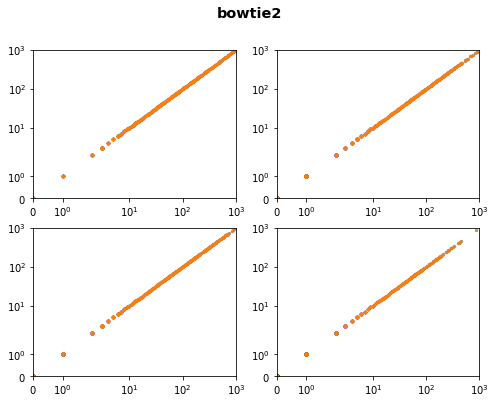

In [6]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'bowtie2'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)

fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


Text(0.5, 0.98, 'kallisto')

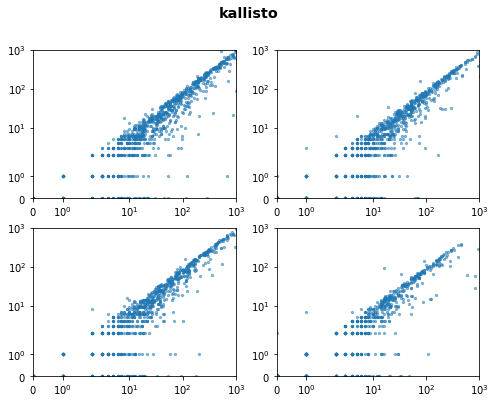

In [7]:
fig, axs = plt.subplots(2,2,figsize = [8,6])
axs=axs.flatten()
aligner = 'kallisto'
dfs = gc_dict[aligner]

x=dfs[0]
for ax, SRR in zip(axs,SRRs):
    for i in range(1,len(dfs)):
        y=dfs[i]
        ax.scatter(x.loc[rand_index, SRR], y.loc[rand_index, SRR], s=5, alpha = 0.5)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')
    ax.set_ylim(0,10**3)
    ax.set_xlim(0,10**3)

fig.suptitle(aligner, fontsize = 'x-large', weight='bold')


# Comparison between aligners + Quantification

In [8]:
SRR = 'SRR5004097'
combo_df = pd.DataFrame(columns=gc_dict.keys())
for key in gc_dict.keys():
    sc = gc_dict[key][0][SRR]
    combo_df[key]=sc
#     d1=pd.DataFrame(x.loc[rand_index, SRR])
#     d1.columns=['d1']
#     d2=pd.DataFrame(y.loc[rand_index, SRR])
#     d1['d2']=d2
# sns.scatterplot(x=[1], y=[2],data=d1)
#         p=sns.regplot(data=d1, x='d1', y='d2', ax = ax)
#         slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
#     print(slope,r_value)



In [9]:
combo_unstack = combo_df.unstack()

In [10]:
combo_unstack = combo_unstack.reset_index().set_index('Contig')

/Users/halexand/anaconda3/envs/python_lab/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/halexand/anaconda3/envs/python_lab/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


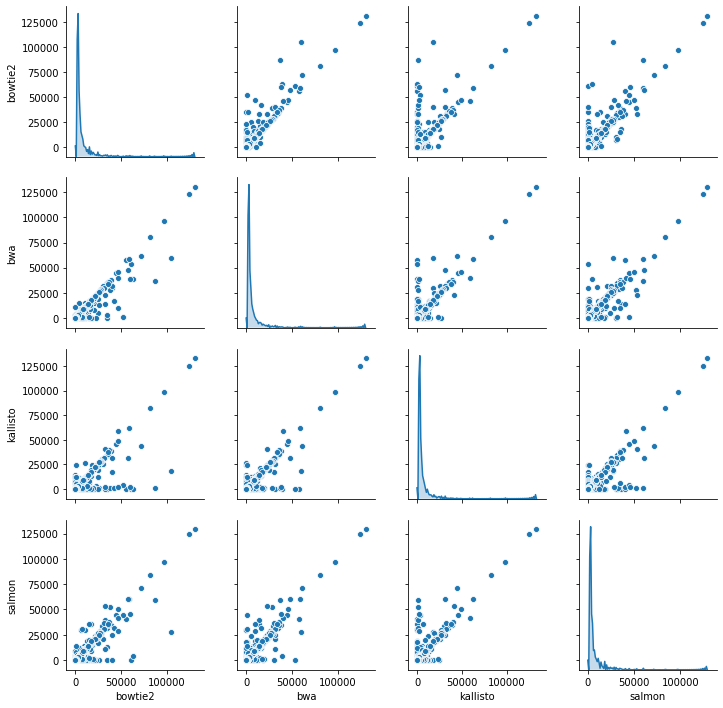

In [11]:
p = sns.pairplot(combo_df, diag_kind =  'kde')
# p.set(xscale="symlog", yscale="symlog")
# p.set(xlim=[0,1000], ylim=[0,1000])

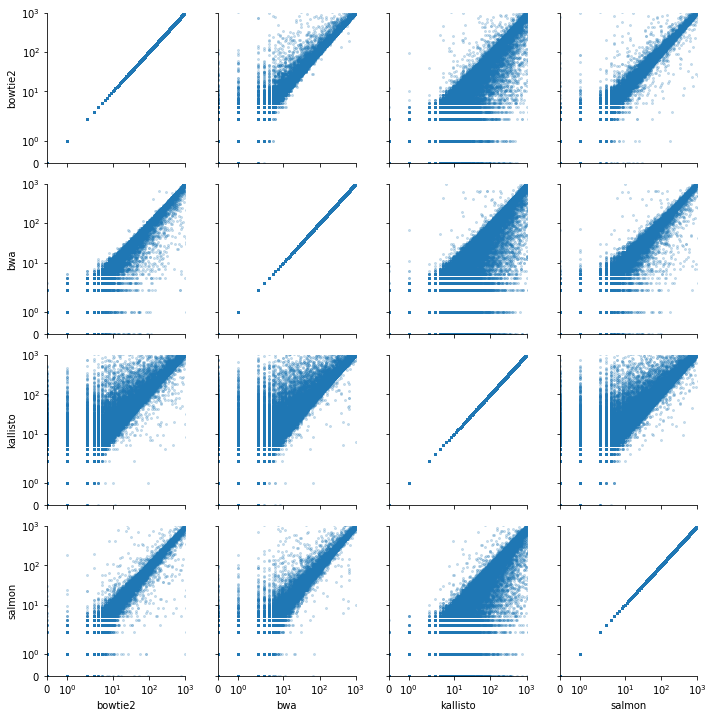

In [12]:
p = sns.PairGrid(combo_df)
p = p.map(plt.scatter, alpha =0.2, s = 4)
p.set(xscale="symlog", yscale="symlog")
p.set(xlim=[0,1000], ylim=[0,1000])


# Salmon only-- looking at biological reps

In [13]:
samples = pd.read_csv('sampletreatments.list', sep = '\t', index_col=1)
p8 = list(samples.loc['pH8.05','Sample'])
p7= list(samples.loc['pH7.5','Sample'])

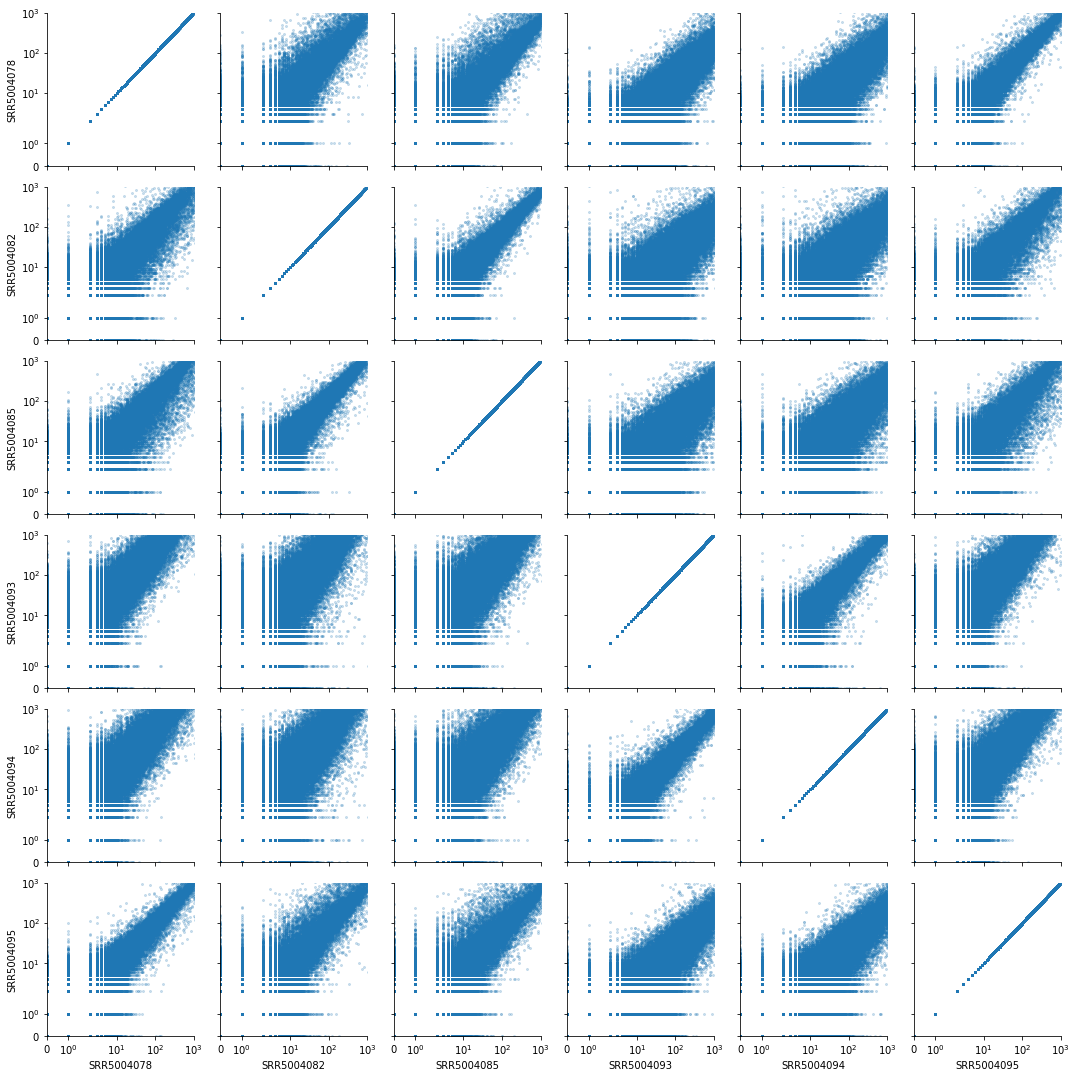

In [14]:
tools = 'salmon'
p = sns.PairGrid(gc_dict[tools][0][p8])
p = p.map(plt.scatter, alpha =0.2, s = 4)
p.set(xscale="symlog", yscale="symlog")
p.set(xlim=[0,1000], ylim=[0,1000])


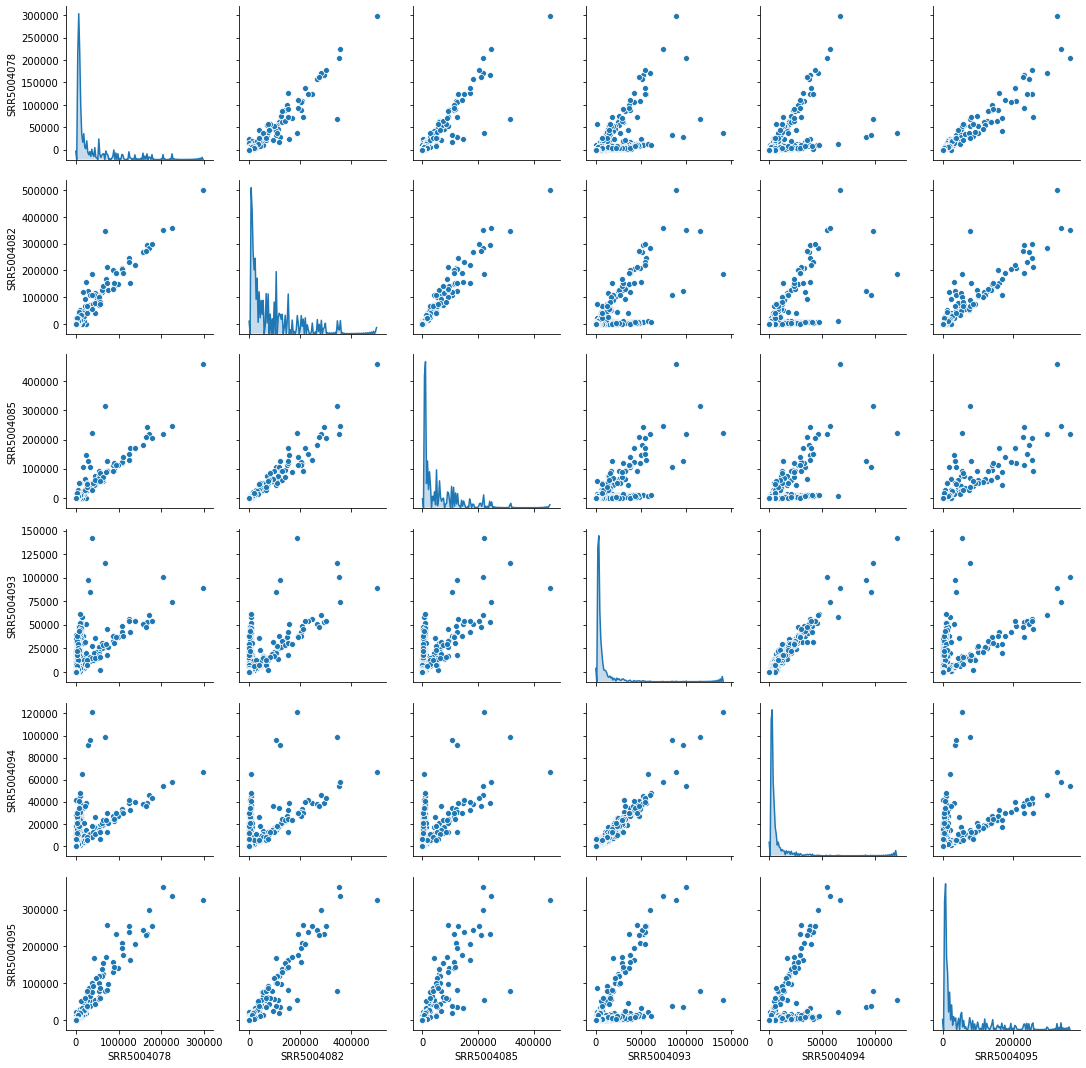

In [15]:
p = sns.pairplot(gc_dict[tools][0][p8], diag_kind =  'kde')


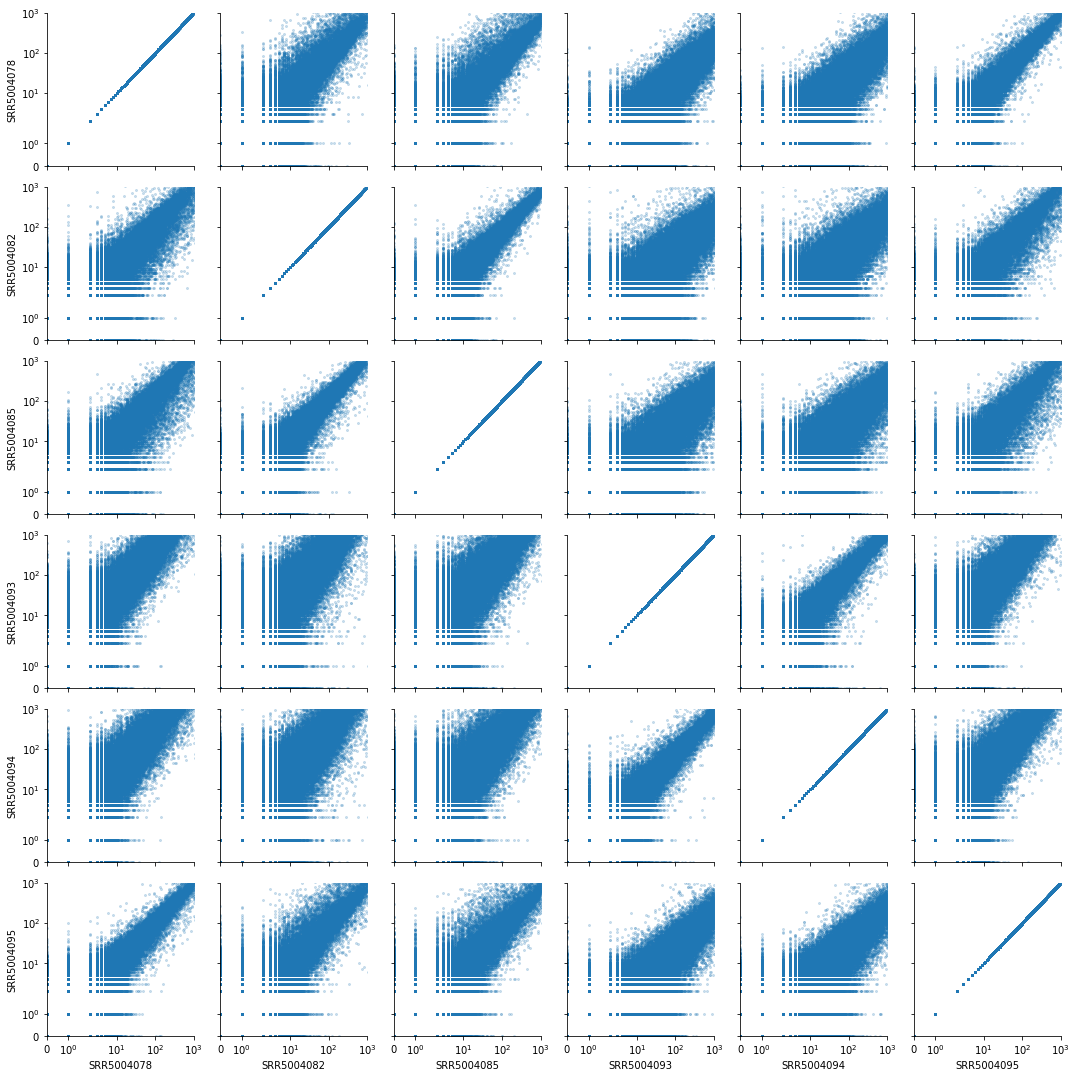

In [16]:
tools = 'bwa'
p = sns.PairGrid(gc_dict['salmon'][0][p8])
p = p.map(plt.scatter, alpha =0.2, s = 4)
p.set(xscale="symlog", yscale="symlog")
p.set(xlim=[0,1000], ylim=[0,1000])

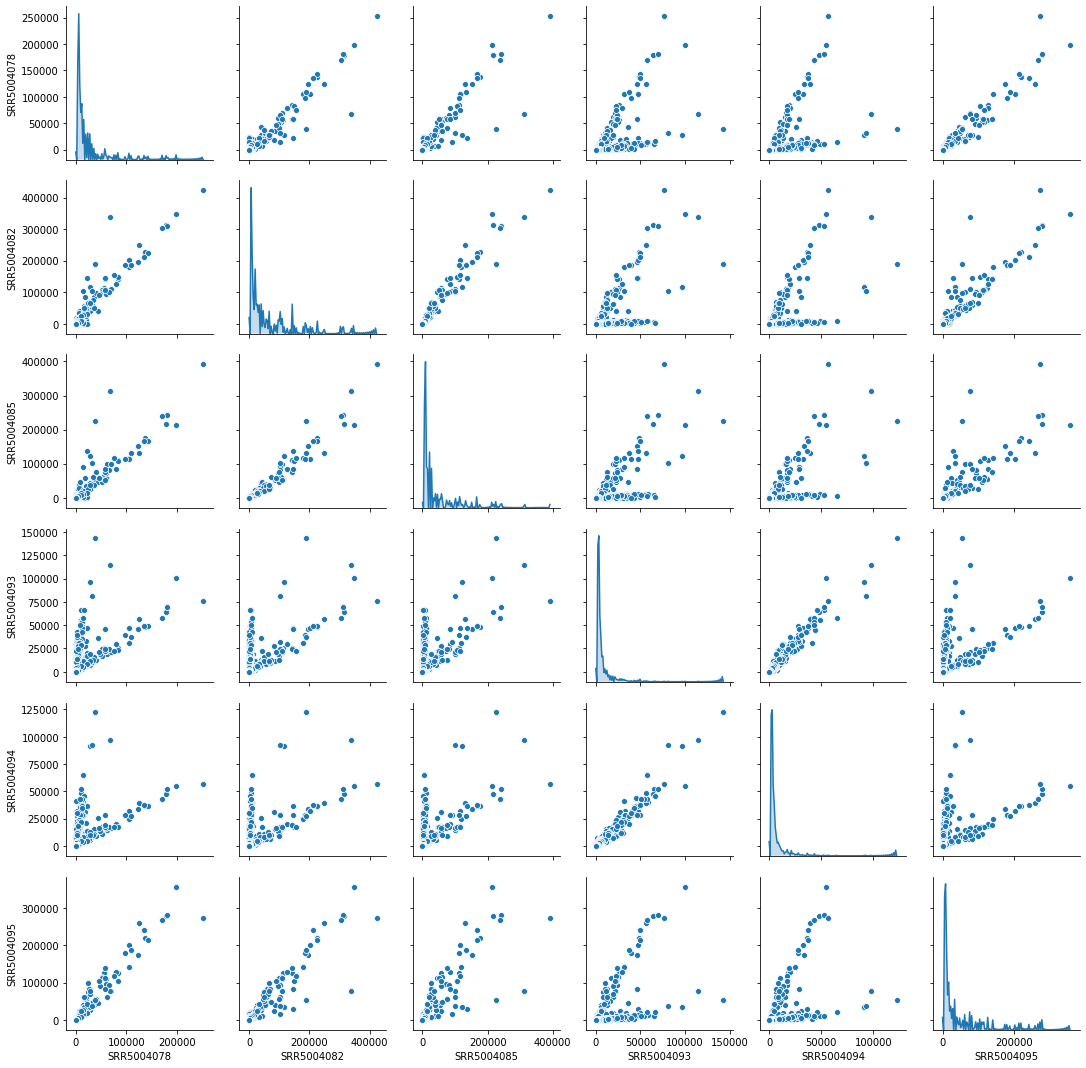

In [17]:
p = sns.pairplot(gc_dict[tools][0][p8], diag_kind =  'kde')


In [25]:
x = nf.loc[:].values# Separating out the target
y = df.loc[:['target']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

,bowtie20,bowtie21,bowtie22,bwa0,bwa1,bwa2,kallisto0,kallisto1,salmon0,salmon1,salmon2
Contig,,,,,,,,,,,
contig#1,287,287.0,287.0,284.0,284.0,284.0,310,69,304,317,317
contig#10,452,452.0,452.0,453.0,455.0,453.0,621,566,436,452,452
contig#100,649,649.0,649.0,647.0,650.0,647.0,664,612,648,667,667
contig#1000,1351,1351.0,1351.0,1337.0,1341.0,1339.0,1377,1231,1358,1394,1394
contig#10000,319,319.0,319.0,302.0,315.0,313.0,402,291,276,314,314
contig#10001,100,100.0,100.0,106.0,107.0,106.0,103,74,96,108,108
contig#10002,181,181.0,181.0,183.0,184.0,184.0,179,159,165,179,179
contig#10003,17,17.0,17.0,17.0,17.0,17.0,17,12,18,18,18
contig#10004,253,253.0,253.0,239.0,241.0,240.0,239,61,275,287,287


In [31]:
conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/halexand/anaconda3/envs/python_lab

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.14.0              |             py_0         201 KB
    scikit-learn-0.21.3        |   py36h27c97d8_0         6.0 MB
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.14.0-py_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-4.0.1-hcfea43d_1
  scikit-learn       pkgs/main/osx-64::scikit-learn-0.21.3-py36h27c97d8_0



joblib-0.14.0 

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
SRR = 'SRR5004097'
ndf = pd.DataFrame()
for key in gc_dict:
    for i,item in enumerate(gc_dict[key]):
        ndf[key+str(i)]=item[SRR]

ndf = ndf.T
ndf = ndf.dropna(axis=1)
values = ndf.columns

features = ndf.index.str.replace('0','').str.replace('1','').str.replace('2','')


In [69]:
#Standardization of the data 
x=ndf[values].values
x = StandardScaler().fit_transform(x)

In [84]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [85]:
principalDf.index=features

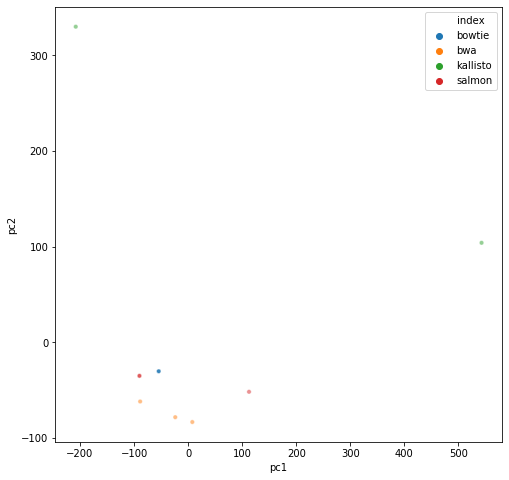

In [104]:
fig, ax = plt.subplots(1, figsize=[8,8])
sns.scatterplot(data = principalDf.reset_index(), x='pc1', y='pc2', hue='index', alpha =0.5, s=20)

In [98]:
principalDf

,pc1,pc2
bowtie,-54.307990,-30.044207
bowtie,-54.307990,-30.044207
bowtie,-54.307990,-30.044207
bwa,7.784610,-83.130410
bwa,-88.696550,-61.665813
bwa,-23.767631,-78.076834
kallisto,-207.801526,330.092719
kallisto,542.722833,104.196308
salmon,112.660541,-51.533069
salmon,-89.989153,-34.875140
